In [27]:
import numpy as np 
import tensorflow

In [28]:
from tensorflow.keras.datasets import mnist

In [29]:
(train_images, train_labels),_ = mnist.load_data()
train_images = train_images.reshape(60000,28*28)
train_images = train_images.astype(np.float32)/255.

In [30]:
train_images_with_noise = np.concatenate([train_images, np.random.random((len(train_images),784))],axis=1)
train_images_with_noise.shape

(60000, 1568)

In [31]:
train_images_with_zeros = np.concatenate([train_images, np.zeros((len(train_images),784))],axis=1)
train_images_with_zeros.shape

(60000, 1568)

In [32]:
from tensorflow import keras
from tensorflow.keras import layers

In [33]:
def get_model():
    model  = keras.Sequential([
        layers.Dense(512,activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [34]:
model = get_model()
history_noise = model.fit(train_images_with_noise,train_labels,epochs=10, validation_split=0.2, batch_size=128)


Epoch 1/10
158/375 [===========>..................] - ETA: 1s - loss: 1.2619 - accuracy: 0.6881

KeyboardInterrupt: 

In [ ]:
history_zeros = model.fit(train_images_with_zeros,train_labels,epochs=10, validation_split=0.2, batch_size=128)


Epoch 1/10
375/375 [==============================] - 3s 7ms/step - loss: 0.3461 - accuracy: 0.9093 - val_loss: 0.3397 - val_accuracy: 0.9096
Epoch 2/10
375/375 [==============================] - 2s 7ms/step - loss: 0.3469 - accuracy: 0.9078 - val_loss: 0.3736 - val_accuracy: 0.9028
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.3556 - accuracy: 0.9058 - val_loss: 0.3768 - val_accuracy: 0.9035
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3635 - accuracy: 0.9045 - val_loss: 0.3804 - val_accuracy: 0.9042
Epoch 5/10
375/375 [==============================] - 2s 7ms/step - loss: 0.3812 - accuracy: 0.9014 - val_loss: 0.4183 - val_accuracy: 0.8982
Epoch 6/10
375/375 [==============================] - 2s 7ms/step - loss: 0.3967 - accuracy: 0.9002 - val_loss: 0.4328 - val_accuracy: 0.8996
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.4070 - accuracy: 0.9006 - val_loss: 0.4320 - val_accuracy: 0.9049
Epoch 

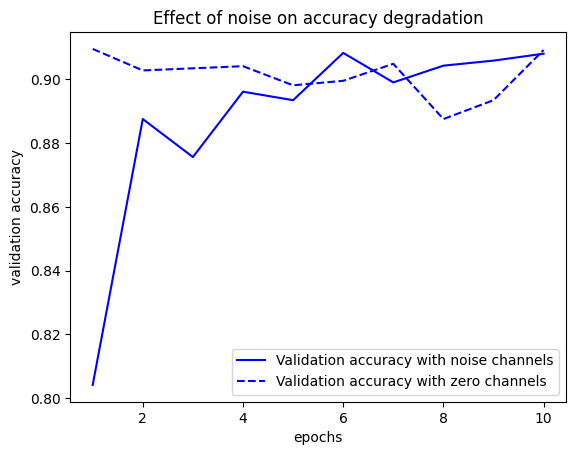

In [ ]:
import matplotlib.pyplot as plt 

val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
plt.plot(range(1,11), val_acc_noise, 'b-',label='Validation accuracy with noise channels')

plt.plot(range(1,11), val_acc_zeros, 'b--',label='Validation accuracy with zero channels')

plt.title('Effect of noise on accuracy degradation')
plt.xlabel('epochs')
plt.ylabel('validation accuracy')
plt.legend()
plt.show()

it is observed that in the end, the validation accuracy of zero channels is better than noise channel due to the noise brought about by the noise
also the training is stable in zero channel, whereas for noise channel it is unstable.

there are many ways , dl model is unable to fit the data and generalize well to new data. if training does not start, the initialization parameters are not set properly or the learning rate is either too high or too low for the application. 
IF the training starts and does not cross baseline accuracy, then it is hard to find the root cause -> maybe the architecture is not suited properly
third problem could be that the underfitting

In [35]:
from keras.datasets import imdb

Effect of regularization : reducing network size, adding regularizers

In [38]:
(train_data, train_labels),_ = imdb.load_data(num_words = 10000)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results


In [39]:
train_data = vectorize_sequences(train_data)

In [40]:
model = keras.Sequential([
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [41]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history_original = model.fit(train_data,train_labels,epochs=20,batch_size=512,validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 33ms/step - loss: 0.5374 - accuracy: 0.7795 - val_loss: 0.4138 - val_accuracy: 0.8757
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3383 - accuracy: 0.8998 - val_loss: 0.3198 - val_accuracy: 0.8889
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2478 - accuracy: 0.9236 - val_loss: 0.3114 - val_accuracy: 0.8744
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1979 - accuracy: 0.9377 - val_loss: 0.2872 - val_accuracy: 0.8847
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1622 - accuracy: 0.9510 - val_loss: 0.2739 - val_accuracy: 0.8915
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1355 - accuracy: 0.9599 - val_loss: 0.2867 - val_accuracy: 0.8881
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1169 - accuracy: 0.9665 - val_loss: 0.3000 - val_accuracy: 0.8861
Epoch 8/20
30

In [42]:
model = keras.Sequential([
    layers.Dense(4,activation='relu'),
    layers.Dense(4,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [43]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history_smallermodel = model.fit(train_data,train_labels,epochs=20,batch_size=512,validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 30ms/step - loss: 0.5936 - accuracy: 0.7025 - val_loss: 0.5463 - val_accuracy: 0.7044
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4796 - accuracy: 0.8136 - val_loss: 0.4767 - val_accuracy: 0.7815
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4081 - accuracy: 0.8609 - val_loss: 0.4009 - val_accuracy: 0.8577
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3538 - accuracy: 0.8877 - val_loss: 0.4125 - val_accuracy: 0.8111
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3115 - accuracy: 0.9089 - val_loss: 0.3477 - val_accuracy: 0.8624
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2752 - accuracy: 0.9262 - val_loss: 0.3456 - val_accuracy: 0.8563
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2475 - accuracy: 0.9366 - val_loss: 0.3024 - val_accuracy: 0.8855
Epoch 8/20
30

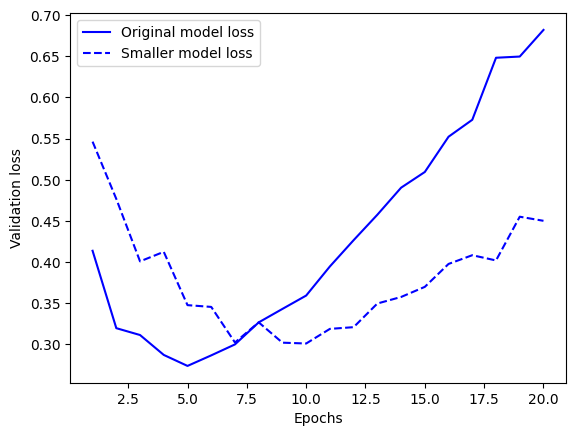

In [46]:
plt.plot(range(1,21), history_original.history['val_loss'],'b-',label='Original model loss')
plt.plot(range(1,21), history_smallermodel.history['val_loss'],'b--',label='Smaller model loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

original model with more number of parameters overfits faster and validation loss blows ,wheras the one with lesser number of paramaters overfits slower and then increases gradually [smoother]

In [48]:
#A bigger model

model = keras.Sequential([
    layers.Dense(512,activation='relu'),
    layers.Dense(512,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history_biggermodel = model.fit(train_data,train_labels,epochs=20,batch_size=512,validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 34ms/step - loss: 0.7493 - accuracy: 0.7141 - val_loss: 0.7617 - val_accuracy: 0.6390
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3730 - accuracy: 0.8530 - val_loss: 0.3973 - val_accuracy: 0.8392
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2933 - accuracy: 0.8938 - val_loss: 0.3699 - val_accuracy: 0.8654
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2600 - accuracy: 0.9077 - val_loss: 0.3114 - val_accuracy: 0.8913
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1938 - accuracy: 0.9351 - val_loss: 0.3664 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1912 - accuracy: 0.9401 - val_loss: 0.4020 - val_accuracy: 0.8779
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2118 - accuracy: 0.9356 - val_loss: 0.3622 - val_accuracy: 0.8844
Epoch 8/20
30

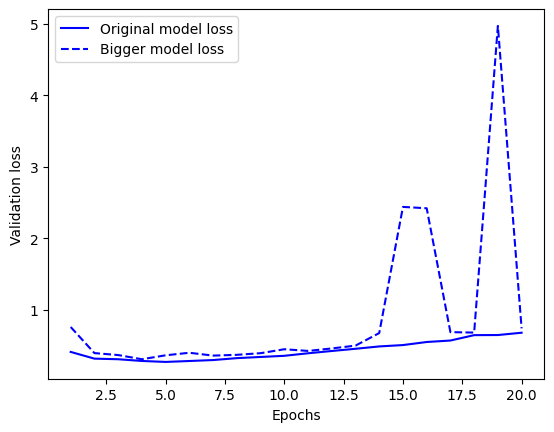

In [49]:
plt.plot(range(1,21), history_original.history['val_loss'],'b-',label='Original model loss')
plt.plot(range(1,21), history_biggermodel.history['val_loss'],'b--',label='Bigger model loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

the bigger model makes the original model look smooth and much much better due to its very fast overfit and unstable training

Adding weight regularization

In [51]:
from tensorflow.keras import regularizers

In [52]:
#adding l2 weight regularization
model = keras.Sequential([
    layers.Dense(16,kernel_regularizer = regularizers.l2(0.002),activation='relu'),
    layers.Dense(16,kernel_regularizer = regularizers.l2(0.002),activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [54]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_l2 = model.fit(train_data, train_labels, validation_split=0.4, batch_size=512,epochs=20
          )

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.6085 - accuracy: 0.7563 - val_loss: 0.4857 - val_accuracy: 0.8716
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4370 - accuracy: 0.8790 - val_loss: 0.4229 - val_accuracy: 0.8682
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3651 - accuracy: 0.9089 - val_loss: 0.3806 - val_accuracy: 0.8856
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3245 - accuracy: 0.9213 - val_loss: 0.3676 - val_accuracy: 0.8829
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2978 - accuracy: 0.9311 - val_loss: 0.3633 - val_accuracy: 0.8831
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2790 - accuracy: 0.9355 - val_loss: 0.3682 - val_accuracy: 0.8786
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2683 - accuracy: 0.9388 - val_loss: 0.3704 - val_accuracy: 0.8789
Epoch 8/20
30

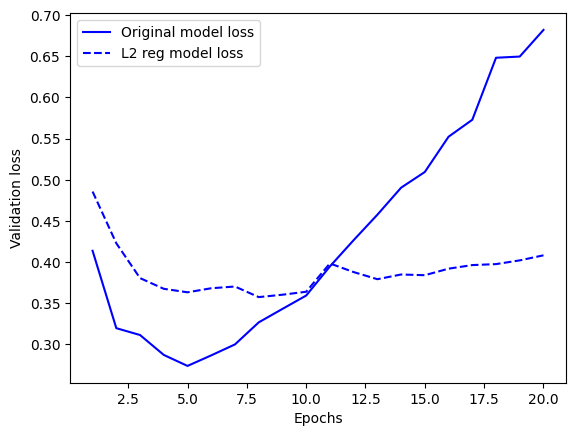

In [56]:
plt.plot(range(1,21), history_original.history['val_loss'],'b-',label='Original model loss')
plt.plot(range(1,21), history_l2.history['val_loss'],'b--',label='L2 reg model loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

we see that the l2 regularized model does not overfit quickly and is very stable when it comes to training with generalization

But this type of l2 regularization or l1 regularization works well for smaller models and does not create a big impact on larger models.
another technique called dropout is used for larger models.

Adding dropout in Keras

In [57]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history_dropout = model.fit(train_data, train_labels, epochs=20,validation_split=0.4,batch_size=512)

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.6658 - accuracy: 0.5859 - val_loss: 0.5429 - val_accuracy: 0.8240
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.5514 - accuracy: 0.7187 - val_loss: 0.4247 - val_accuracy: 0.8466
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4400 - accuracy: 0.8031 - val_loss: 0.3390 - val_accuracy: 0.8824
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3546 - accuracy: 0.8549 - val_loss: 0.3137 - val_accuracy: 0.8757
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2958 - accuracy: 0.8838 - val_loss: 0.2789 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2568 - accuracy: 0.9067 - val_loss: 0.2775 - val_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2295 - accuracy: 0.9226 - val_loss: 0.2786 - val_accuracy: 0.8906
Epoch 8/20
30

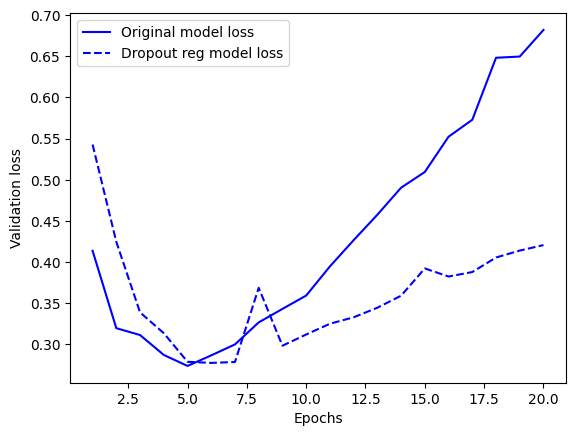

In [58]:
plt.plot(range(1,21), history_original.history['val_loss'],'b-',label='Original model loss')
plt.plot(range(1,21), history_dropout.history['val_loss'],'b--',label='Dropout reg model loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

Dropout model is also good with overfitting occuring late and the validation loss also does not rise up like original model